<a href="https://colab.research.google.com/github/SriVarshini15/Data-Science/blob/main/StudentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Reading DataSet

In [72]:
df = pd.read_csv("/content/Student_Performance.csv")

#Preprocessing

In [73]:
le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])


In [74]:
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

#Splitting Dataset

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Model Building

In [76]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#Predicting Output

In [77]:
y_pred = lr.predict(X_test)

#Calculating RMSE AND R^2 Score

In [78]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [79]:
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 2.02
R² Score: 0.99


#Visualization

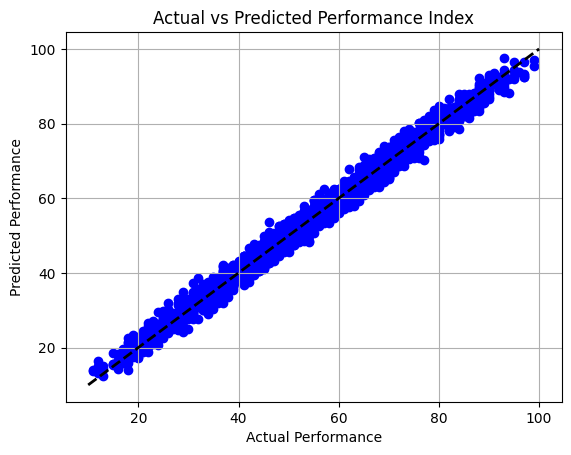

In [80]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Actual vs Predicted Performance Index")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

#Correlation Heatmap

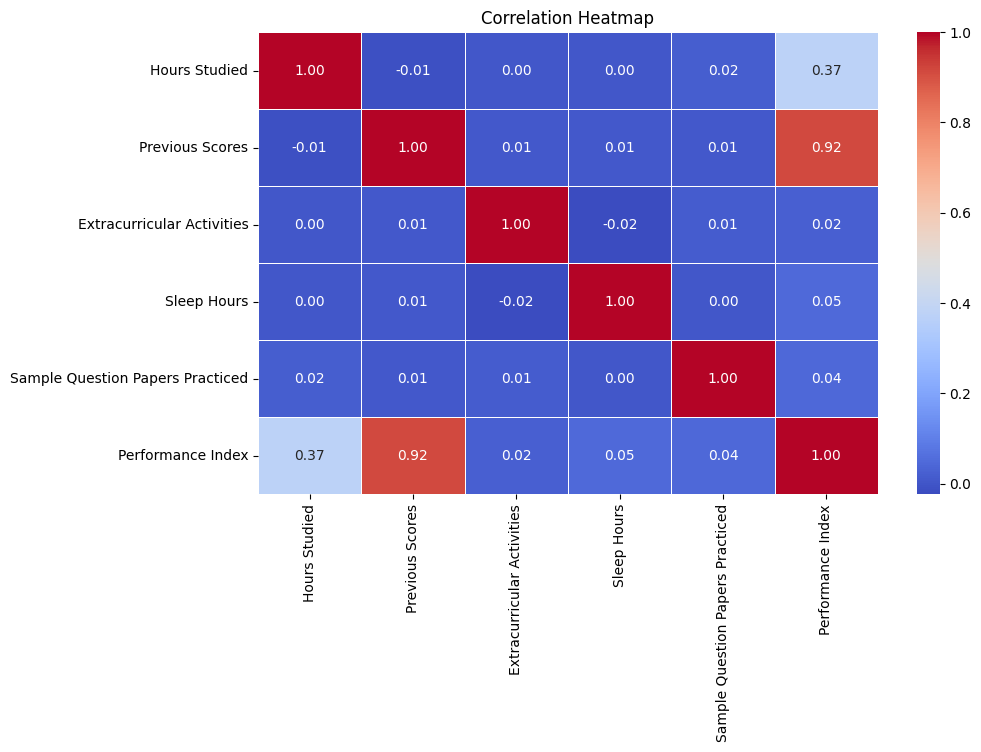

In [81]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#Test case

In [82]:
from math import floor

In [83]:
predicted_performance = lr.predict([[6, 80, 1, 7, 3]])
print("Predicted Performance Index:", floor(predicted_performance[0]))

Predicted Performance Index: 69


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
